In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tomato leaf /Tomato Leaf Deasise Dataset/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tomato leaf /Tomato Leaf Deasise Dataset/val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tomato leaf /Tomato Leaf Deasise Dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 7560 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.
Found 2160 images belonging to 9 classes.


In [9]:
MobileNetv2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

9406464/9406464 [==============================] - 0s 0us/step


In [10]:
MobileNetv2.trainable = False

In [11]:
model = tf.keras.models.Sequential([
  MobileNetv2,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=9, activation='softmax'),
])

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 9)                 4617      
                                                        

In [13]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 5
)

Epoch 1/5
237/237 [==============================] - 2008s 8s/step - loss: 2.2287 - accuracy: 0.6422 - val_loss: 0.6397 - val_accuracy: 0.7907
Epoch 2/5
237/237 [==============================] - 144s 608ms/step - loss: 0.6295 - accuracy: 0.7848 - val_loss: 0.5014 - val_accuracy: 0.8361
Epoch 3/5
237/237 [==============================] - 142s 598ms/step - loss: 0.5687 - accuracy: 0.8098 - val_loss: 0.5789 - val_accuracy: 0.8176
Epoch 4/5
237/237 [==============================] - 140s 591ms/step - loss: 0.4966 - accuracy: 0.8296 - val_loss: 0.5249 - val_accuracy: 0.8278
Epoch 5/5
237/237 [==============================] - 143s 603ms/step - loss: 0.4451 - accuracy: 0.8431 - val_loss: 0.4456 - val_accuracy: 0.8593


In [14]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

68/68 [==============================] - 649s 10s/step - loss: 0.4103 - accuracy: 0.8569
Accuracy: 0.8569444417953491
Loss: 0.4102708399295807


In [15]:
test.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Healthy': 2,
 'Late_blight': 3,
 'Leaf_Mold': 4,
 'Septoria_leaf_spot': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8}

In [16]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Bacterial_spot','Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

68/68 [==============================] - 34s 496ms/step
                               precision    recall  f1-score   support

               Bacterial_spot       0.83      0.95      0.88       240
                 Early_blight       0.89      0.57      0.70       240
                      Healthy       0.83      0.97      0.90       240
                  Late_blight       0.83      0.85      0.84       240
                    Leaf_Mold       0.78      0.94      0.85       240
           Septoria_leaf_spot       0.84      0.79      0.81       240
                  Target_Spot       0.87      0.70      0.77       240
Tomato_Yellow_Leaf_Curl_Virus       0.98      0.95      0.97       240
          Tomato_mosaic_virus       0.90      1.00      0.95       240

                     accuracy                           0.86      2160
                    macro avg       0.86      0.86      0.85      2160
                 weighted avg       0.86      0.86      0.85      2160



<Axes: >

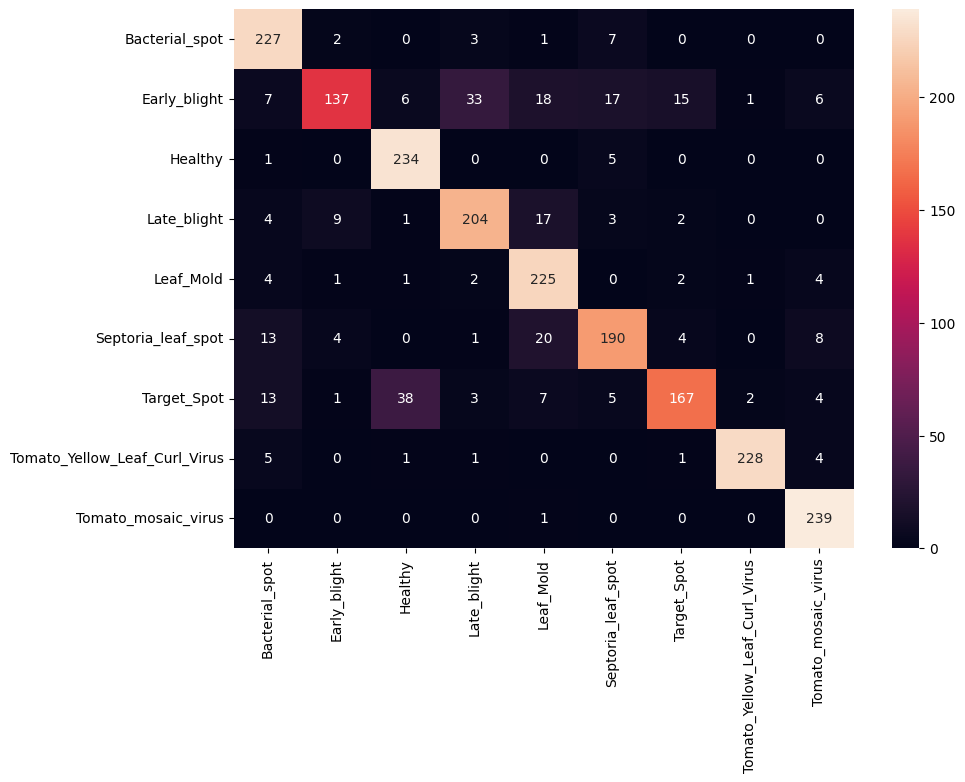

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in  ['Bacterial_spot','Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']],
                  columns = [i for i in  ['Bacterial_spot','Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

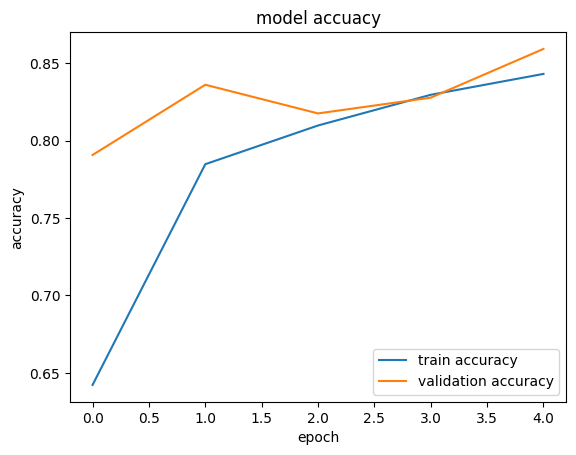

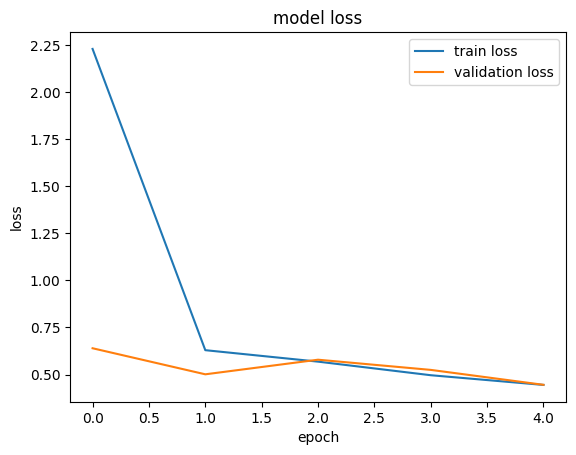

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()